In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# %pip install --q vectice -U
import vectice as vect

vec = vect.connect(config="tut.json")

VECTICE_API_ENDPOINT is deprecated and will be removed in 23.3.1.0, please use VECTICE_HOST instead.
Welcome, Aidan. You`re now successfully connected to Vectice.

To access your personal workspace, use connection.my_workspace
To access a specific workspace, use connection.workspace(Workspace ID)
To get a list of workspaces you can access and their IDs, use connection.list_workspaces()

If you are using a notebook you can call the help by using a Vectice returned object with the builtin notebook "?":
>> connection?

If you are using an IDE you can call the help() method on any object returned by Vectice:
>> help(connection)

For quick access to the list of workspaces in the Vectice web app, visit:
https://dev.vectice.com/workspaces


In [17]:
workspace = vec.workspace("Create Sample Tutorial Project") # Your personal workspace can be access with my_workspace property

Workspace 'Create Sample Tutorial Project' successfully retrieved."

For quick access to the workspace in the Vectice web app, visit:
https://dev.vectice.com/browse/workspace/WSP-273


In [18]:
project = workspace.project("Store Sales Prediction") # pass the ID of your tutorial project

Project 'Store Sales Prediction' successfully retrieved."

For quick access to the Project in the Vectice web app, visit:
https://dev.vectice.com/browse/project/PRJ-561


In [23]:
iteration = project.phase("PHA-1169").create_iteration()

Phase 'Data Understanding' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://dev.vectice.com/browse/phase/PHA-1169
Iteration number '3' successfully retrieved."

For quick access to the Iteration in the Vectice web app, visit:
https://dev.vectice.com/browse/iteration/ITR-330


In [20]:
df = pd.read_csv("SampleSuperstore.csv")

In [21]:
origin_ds = vect.FileResource(paths="SampleSuperstore.csv", dataframes=df)


origin_dataset = vect.Dataset.origin(
    name="SampleSuperstore origin dataset",
    resource=origin_ds, 
)

File: SampleSuperstore.csv wrapped successfully.


In [24]:
iteration.step_collect_initial_data = origin_dataset

New Version: 'Version 3' of Dataset: 'SampleSuperstore origin dataset' added to Step: Collect Initial Data
Attachments: None
Link to Step: https://dev.vectice.com/browse/iteration/ITR-330



In [25]:
iteration.step_describe_data = str(df.columns)

Added Comment to Step: Describe Data

Link to Step: https://dev.vectice.com/browse/iteration/ITR-330



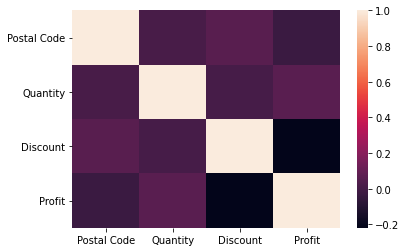

In [26]:
## Checking for Multicollinearity
corr_matrix=df.select_dtypes("number").drop("Sales",axis=1).corr()
sns.heatmap(corr_matrix);
plt.savefig("corr_matrix.png")

In [27]:
iteration.step_explore_data = "corr_matrix.png"

Added Image: 'corr_matrix.png' to Step: Explore data

Link to Step: https://dev.vectice.com/browse/iteration/ITR-330



C:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


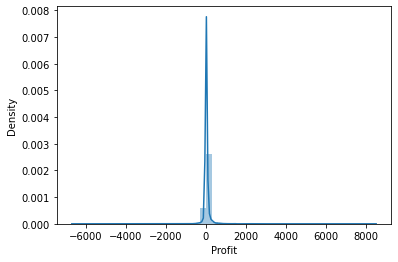

In [28]:
#Checking for outliers
sns.distplot(df["Profit"]);
plt.savefig("Profit.png")

In [29]:
iteration.step_explore_data +="Profit.png"

Added Image: 'Profit.png' to Step: Explore data

Link to Step: https://dev.vectice.com/browse/iteration/ITR-330



C:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


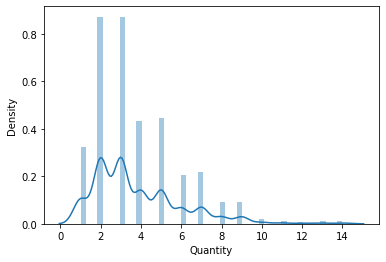

In [30]:
#Checking for outliers
sns.distplot(df["Quantity"])
plt.savefig("Quantity.png")

In [31]:
iteration.step_explore_data += "Quantity.png"

Added Image: 'Quantity.png' to Step: Explore data

Link to Step: https://dev.vectice.com/browse/iteration/ITR-330

